## Laboratorio 2 Practica Arboles Decisión y Ramdom Forest

**Maestría:** Maestría en Inteligencia Artificial
**Materia:** Aprendizaje Automático MIA
**Presentado por:** Veronica Chimbo, Kevin Calle, Sergio Santoyo, Javier Parra @datajpbi
**Fecha:** 2018-06-15
**Lenguaje:** Python
**Versión:** 3.7

In [1]:
#!/usr/bin/env python 3.7

In [1]:
# -*- coding: utf-8 -*-
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn import metrics # para la matriz de confusion
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris, load_breast_cancer
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import os


### 1.Carga, Entendimiento y Limpieza Información

In [2]:
df_parking_hours = pd.read_csv('hour.csv', sep = ',')

B.- Exploración del DataFrame Presentación de cinco primeras filas

In [4]:
print(df_parking_hours.head())
print(df_parking_hours.index) 
print(df_parking_hours.columns) #Presentamos las columnas
#Presentación de data preliminar, 5 primeras filas
df_parking_hours.head(5) 

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
RangeIndex(start=0, stop=17379, step=1)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', '

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_parking_hours.groupby ('season').agg({'cnt':['count']})# temporada del año no genera cambios importantes en la demanda.

,cnt
,count
season,
1,4242
2,4409
3,4496
4,4232


In [6]:
df_parking_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


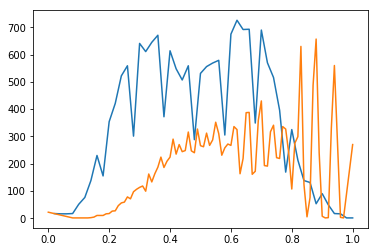

In [7]:
# Explorando las varibles del modelo.

temp_user=df_parking_hours.groupby ('temp').agg({'cnt':['count']}) # la variable temperatura si es decisiva en el modelo.
plt.plot (temp_user)

humed_user=df_parking_hours.groupby ('hum').agg({'cnt':['count']}) # 
plt.plot (humed_user)


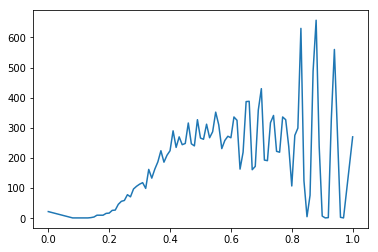

In [8]:
humed_user=df_parking_hours.groupby ('hum').agg({'cnt':['count']}) # 
plt.plot (humed_user)

C.- Eliminación de missings,

In [9]:
#Eliminación de NA, no tiene.

df_parking_hours = df_parking_hours.dropna()
df_parking_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


D.- Visualización de la información de: aceleración y modelo de año

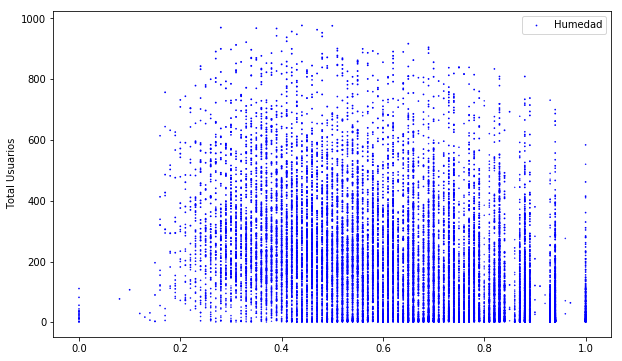

In [10]:
plt.figure(figsize=(10, 6))
#plt.scatter(df_parking_hours.temp, df_parking_hours.cnt, c='r', s=df_parking_hours.temp*1, alpha=1, label='Temperatura')
plt.scatter(df_parking_hours.hum, df_parking_hours.cnt, c='b', s=df_parking_hours.temp*1, alpha=1, label='Humedad')
plt.ylabel('Total Usuarios')
plt.legend()
plt.show()

E.- Histograma.

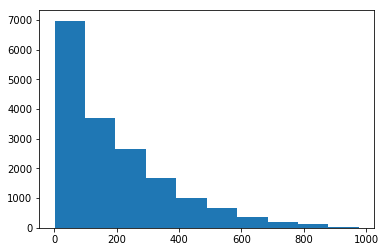

In [11]:

plt.hist(df_parking_hours['cnt'])
plt.show()

F.- Normalización de la data y visualización de la misma

In [12]:
# normalización data y quitar columnas no relebantes en el modelo, cómo lo sabemos??
scaler = MinMaxScaler()
df_normalizado = df_parking_hours.drop(['instant','yr','dteday', 'atemp', 'hum', 
                                                       'windspeed', 'casual', 'registered'],axis=1)
df_normalizado = scaler.fit_transform(df_normalizado)
df_normalizado = pd.DataFrame(df_normalizado, columns=['season', 'mnth', 'hr', 'holiday', 'weekday',
                                                       'workingday', 'weathersit', 'temp',  'cnt'])
df_parking_hours = df_normalizado 
df_parking_hours.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.500547,0.503434,0.502033,0.028770,0.500614,0.682721,0.141761,0.486722,0.193097
std,0.368973,0.312616,0.300626,0.167165,0.334295,0.465431,0.213119,0.196486,0.185848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.260870,0.000000,0.166667,0.000000,0.000000,0.326531,0.039959
50%,0.666667,0.545455,0.521739,0.000000,0.500000,1.000000,0.000000,0.489796,0.144467
75%,0.666667,0.818182,0.782609,0.000000,0.833333,1.000000,0.333333,0.653061,0.286885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_parking_hours

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,cnt
0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.015369
1,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.039959
2,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.031762
3,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.012295
4,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.000000
5,0.0,0.0,0.217391,0.0,1.000000,0.0,0.333333,0.224490,0.000000
6,0.0,0.0,0.260870,0.0,1.000000,0.0,0.000000,0.204082,0.001025
7,0.0,0.0,0.304348,0.0,1.000000,0.0,0.000000,0.183673,0.002049
8,0.0,0.0,0.347826,0.0,1.000000,0.0,0.000000,0.224490,0.007172
9,0.0,0.0,0.391304,0.0,1.000000,0.0,0.000000,0.306122,0.013320


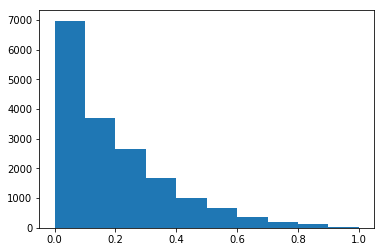

In [14]:
# Cnt Normalizado
plt.hist(df_parking_hours['cnt'])
plt.show()

### 2. Alistamiento y selección de Información¶

In [15]:
# Definición de la lista de valores Y (Vector)
y = df_parking_hours['cnt']
print('Count: ' + str(y.shape))

Count: (17379,)


In [16]:
df_parking_hours.describe()
#Creación de valores X, observaciones
to_drop = ['cnt'] 
x_data_df = df_parking_hours.drop(['cnt'],axis=1)
#Convierte en matriz de tipo flotante cada archivo
X = x_data_df.as_matrix().astype(np.float)
print('Count of registers and columns: ' + str(X.shape))

Count of registers and columns: (17379, 8)


### 3. Elaboración modelo


A.- Creación de los conjuntos de prueba y de entrenamiento

In [17]:
#Creación de los conjuntos 20% para pruebas y 80% para entrenamiento. Semilla con valor random_state=4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### B.- Creación del modelo regresión

B.1- DecisionTreeDecisionTreeRegressor()

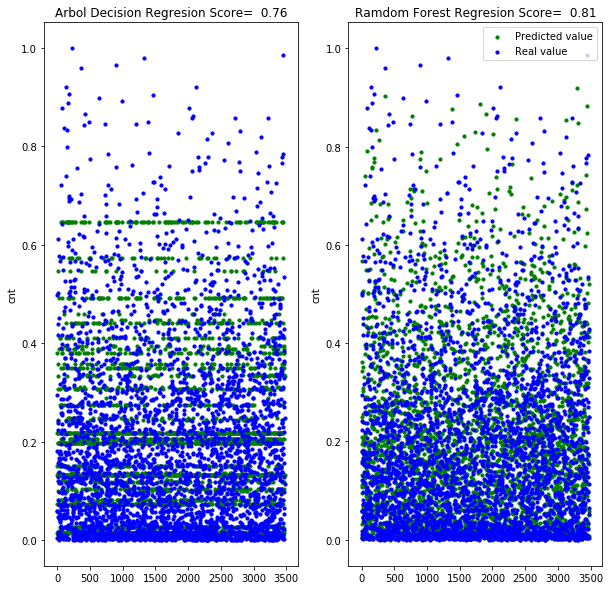

In [18]:
# Modelo de Regresion Arbol de decisión
arbol=DecisionTreeRegressor(criterion = 'mse', random_state = 0, max_leaf_nodes = 40 )# mejorar el modelo
arbol.fit(X_train, y_train)
arbol.score(X_test, y_test) #0.8951965384378124
arbol.score(X_train, y_train) # 0.999996196996331
y_predicho_dtr =  arbol.predict(X_test)
y_real=y_test.as_matrix()
score_dtr = r2_score(y_real, y_predicho_dtr)

# Modelo de Regresion Ramdom Forest
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_predicho_rfr = rf.predict(X_test)
score_rfr = r2_score(y_real, y_predicho_rfr)

fig, (plot0, plot1) = plt.subplots (ncols=2, figsize =(10, 10),  sharex =False, sharey =False)
ejex = range(y_predicho_rfr.shape[0])
plot0.scatter( ejex, y_predicho_dtr, c='g', s=10, alpha=1, label='Predicted value')
plot0.scatter(ejex, y_real, c='b', s=10, alpha=1, label='Real value')
plot0.set_ylabel('cnt')
plot0.set_title("Arbol Decision Regresion Score=  "+ str(round(score_dtr,2)))

plot1.scatter( ejex, y_predicho_rfr, c='g', s=10, alpha=1, label='Predicted value')
plot1.scatter(ejex, y_real, c='b', s=10, alpha=1, label='Real value')
plot1.set_ylabel('cnt')
plot1.set_title("Ramdom Forest Regresion Score=  "+ str(round(score_rfr,2)))

plt.legend()
plt.show()

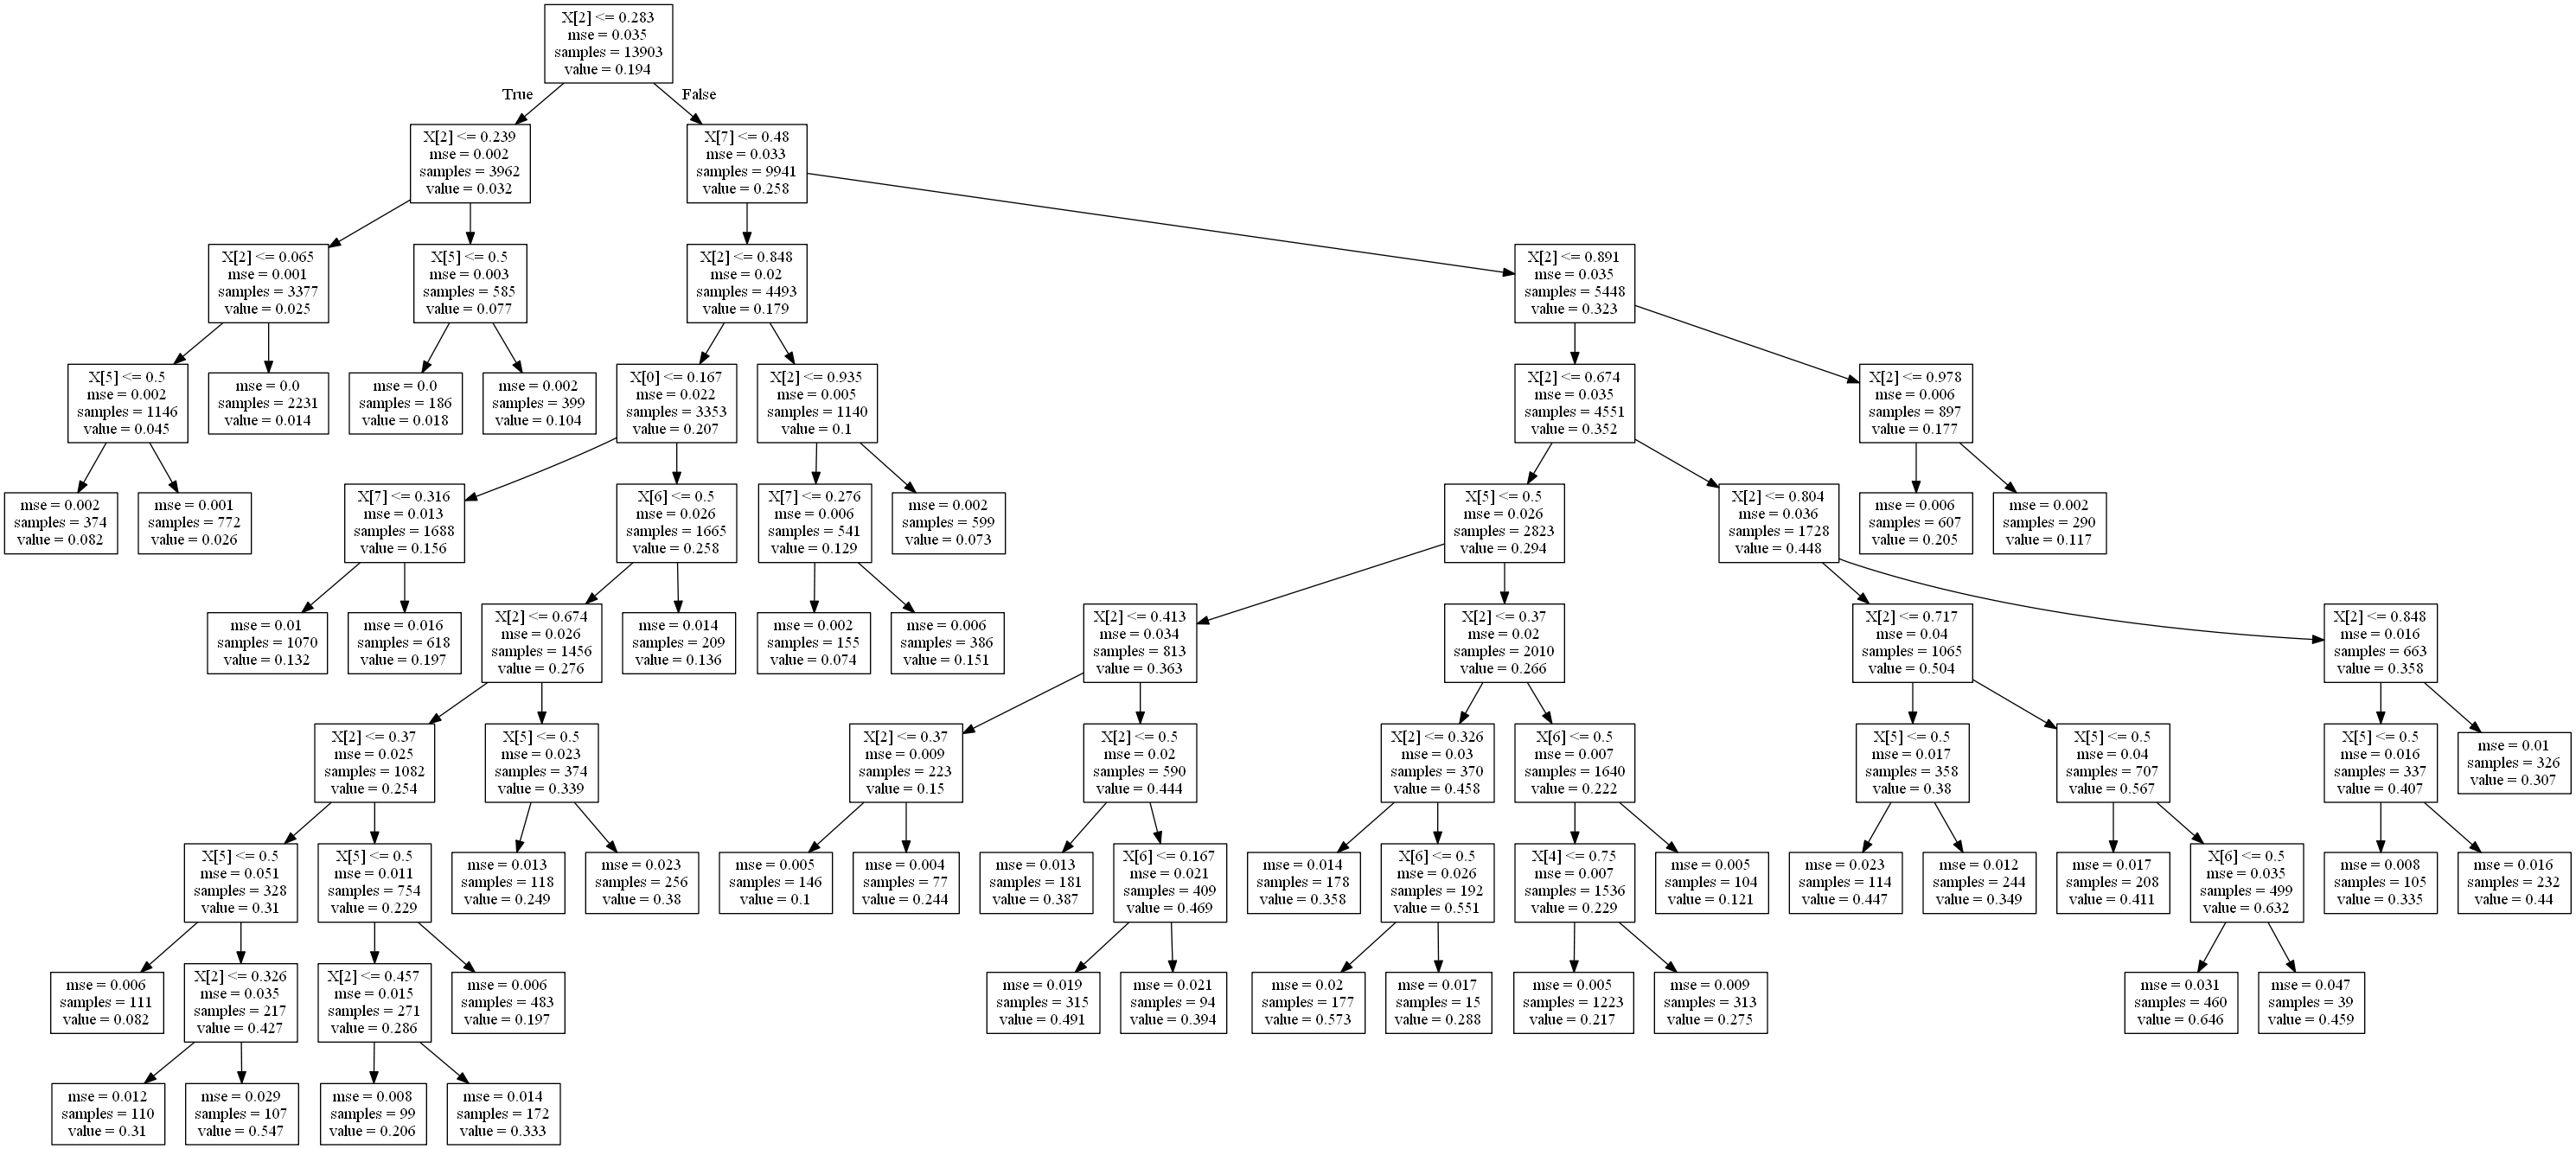

In [19]:
# Gráfica del arbol de decisión regresión

with open('tree.dot', 'w') as dotfile:
    tree.export_graphviz(arbol, dotfile)
    
os.system("dot -Tpng tree.dot -o tree.png")
from IPython.core.display import Image
Image("tree.png")



### Creación Modelo de clasificación

count    17379.000000
mean         0.193097
std          0.185848
min          0.000000
25%          0.039959
50%          0.144467
75%          0.286885
max          1.000000
Name: cnt, dtype: float64


(array([10677.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6702.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

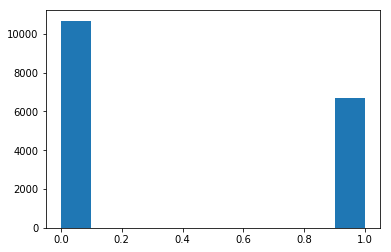

In [20]:
# Debemos convertir nuestra varible objetivo en categorica para poder utilizar modelos de clasificación.
print (y.describe())# para decidir en que ranfo categorizar la variable.
y_binaria = np.where(y >= 0.2, 1, 0) # se categoriza la variable.  > 0.2 alta demanda, baja demanda 
plt.hist (y_binaria)


In [21]:
#Creación de los conjuntos 20% para pruebas y 80% para entrenamiento. Semilla con valor random_state=4

X_train, X_test, y_train, y_test = train_test_split(X, y_binaria, test_size=0.2, random_state=4)



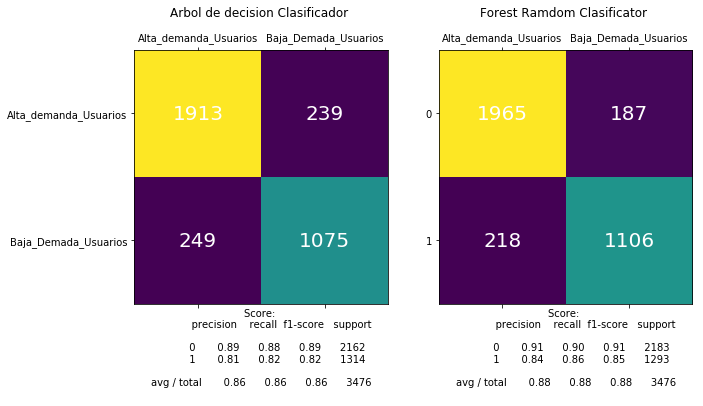

In [22]:
# Modelo de clasificación arbol de decisión
arbol_dtc=DecisionTreeClassifier(max_leaf_nodes= 40)
arbol_dtc.fit(X_train, y_train)
y_predicho_dtc=arbol_dtc.predict(X_test)
y_real=y_test
cm_dtc = metrics.confusion_matrix(y_predicho_dtc, y_real)# gráfica Matriz Confusion Comparando lo predicho con lo Real
score_dtc= metrics.classification_report(y_predicho_dtc, y_real)
# Modelo de clasificación ramdom forest
rf = RandomForestClassifier(max_depth=30, n_estimators=12)
rf.fit(X_train, y_train)
y_predicho_rfc = rf.predict(X_test)
cm_rfc = metrics.confusion_matrix(y_predicho_rfc, y_real)# gráfica Matriz Confusion Comparando lo predicho con lo Real
score_rfc = metrics.classification_report(y_predicho_rfc, y_real)

fig, (plot0, plot1) = plt.subplots (ncols=2, figsize =(10, 10),  sharex =False, sharey =False)

plot0.matshow(cm_dtc)
plot0.set_title("Arbol de decision Clasificador \n")
plot0.set_xticklabels([''] + ['Alta_demanda_Usuarios', 'Baja_Demada_Usuarios'], size=10)
plot0.set_yticklabels([''] + ['Alta_demanda_Usuarios', 'Baja_Demada_Usuarios'], size=10)
plot0.set_xlabel("Score: \n" + str(score_dtc))

for i in range(2):
    for j in range(2):
        plot0.text(i, j, cm_dtc[i,j], va='center', ha='center',color='white',size=20)

        
plot1.matshow(cm_rfc)
plot1.set_title("Forest Ramdom Clasificator \n")
plot1.set_xticklabels([''] + ['Alta_demanda_Usuarios', 'Baja_Demada_Usuarios'], size=10)
#plot1.set_yticklabels([''] + ['Alta_demanda_Usuarios', 'Baja_Demada_Usuarios'], size=10)
plot1.set_xlabel("Score: \n" + str(score_rfc))

for i in range(2):
    for j in range(2):
        plot1.text(i, j, cm_rfc[i,j], va='center', ha='center',color='white',size=20)
plt.show()

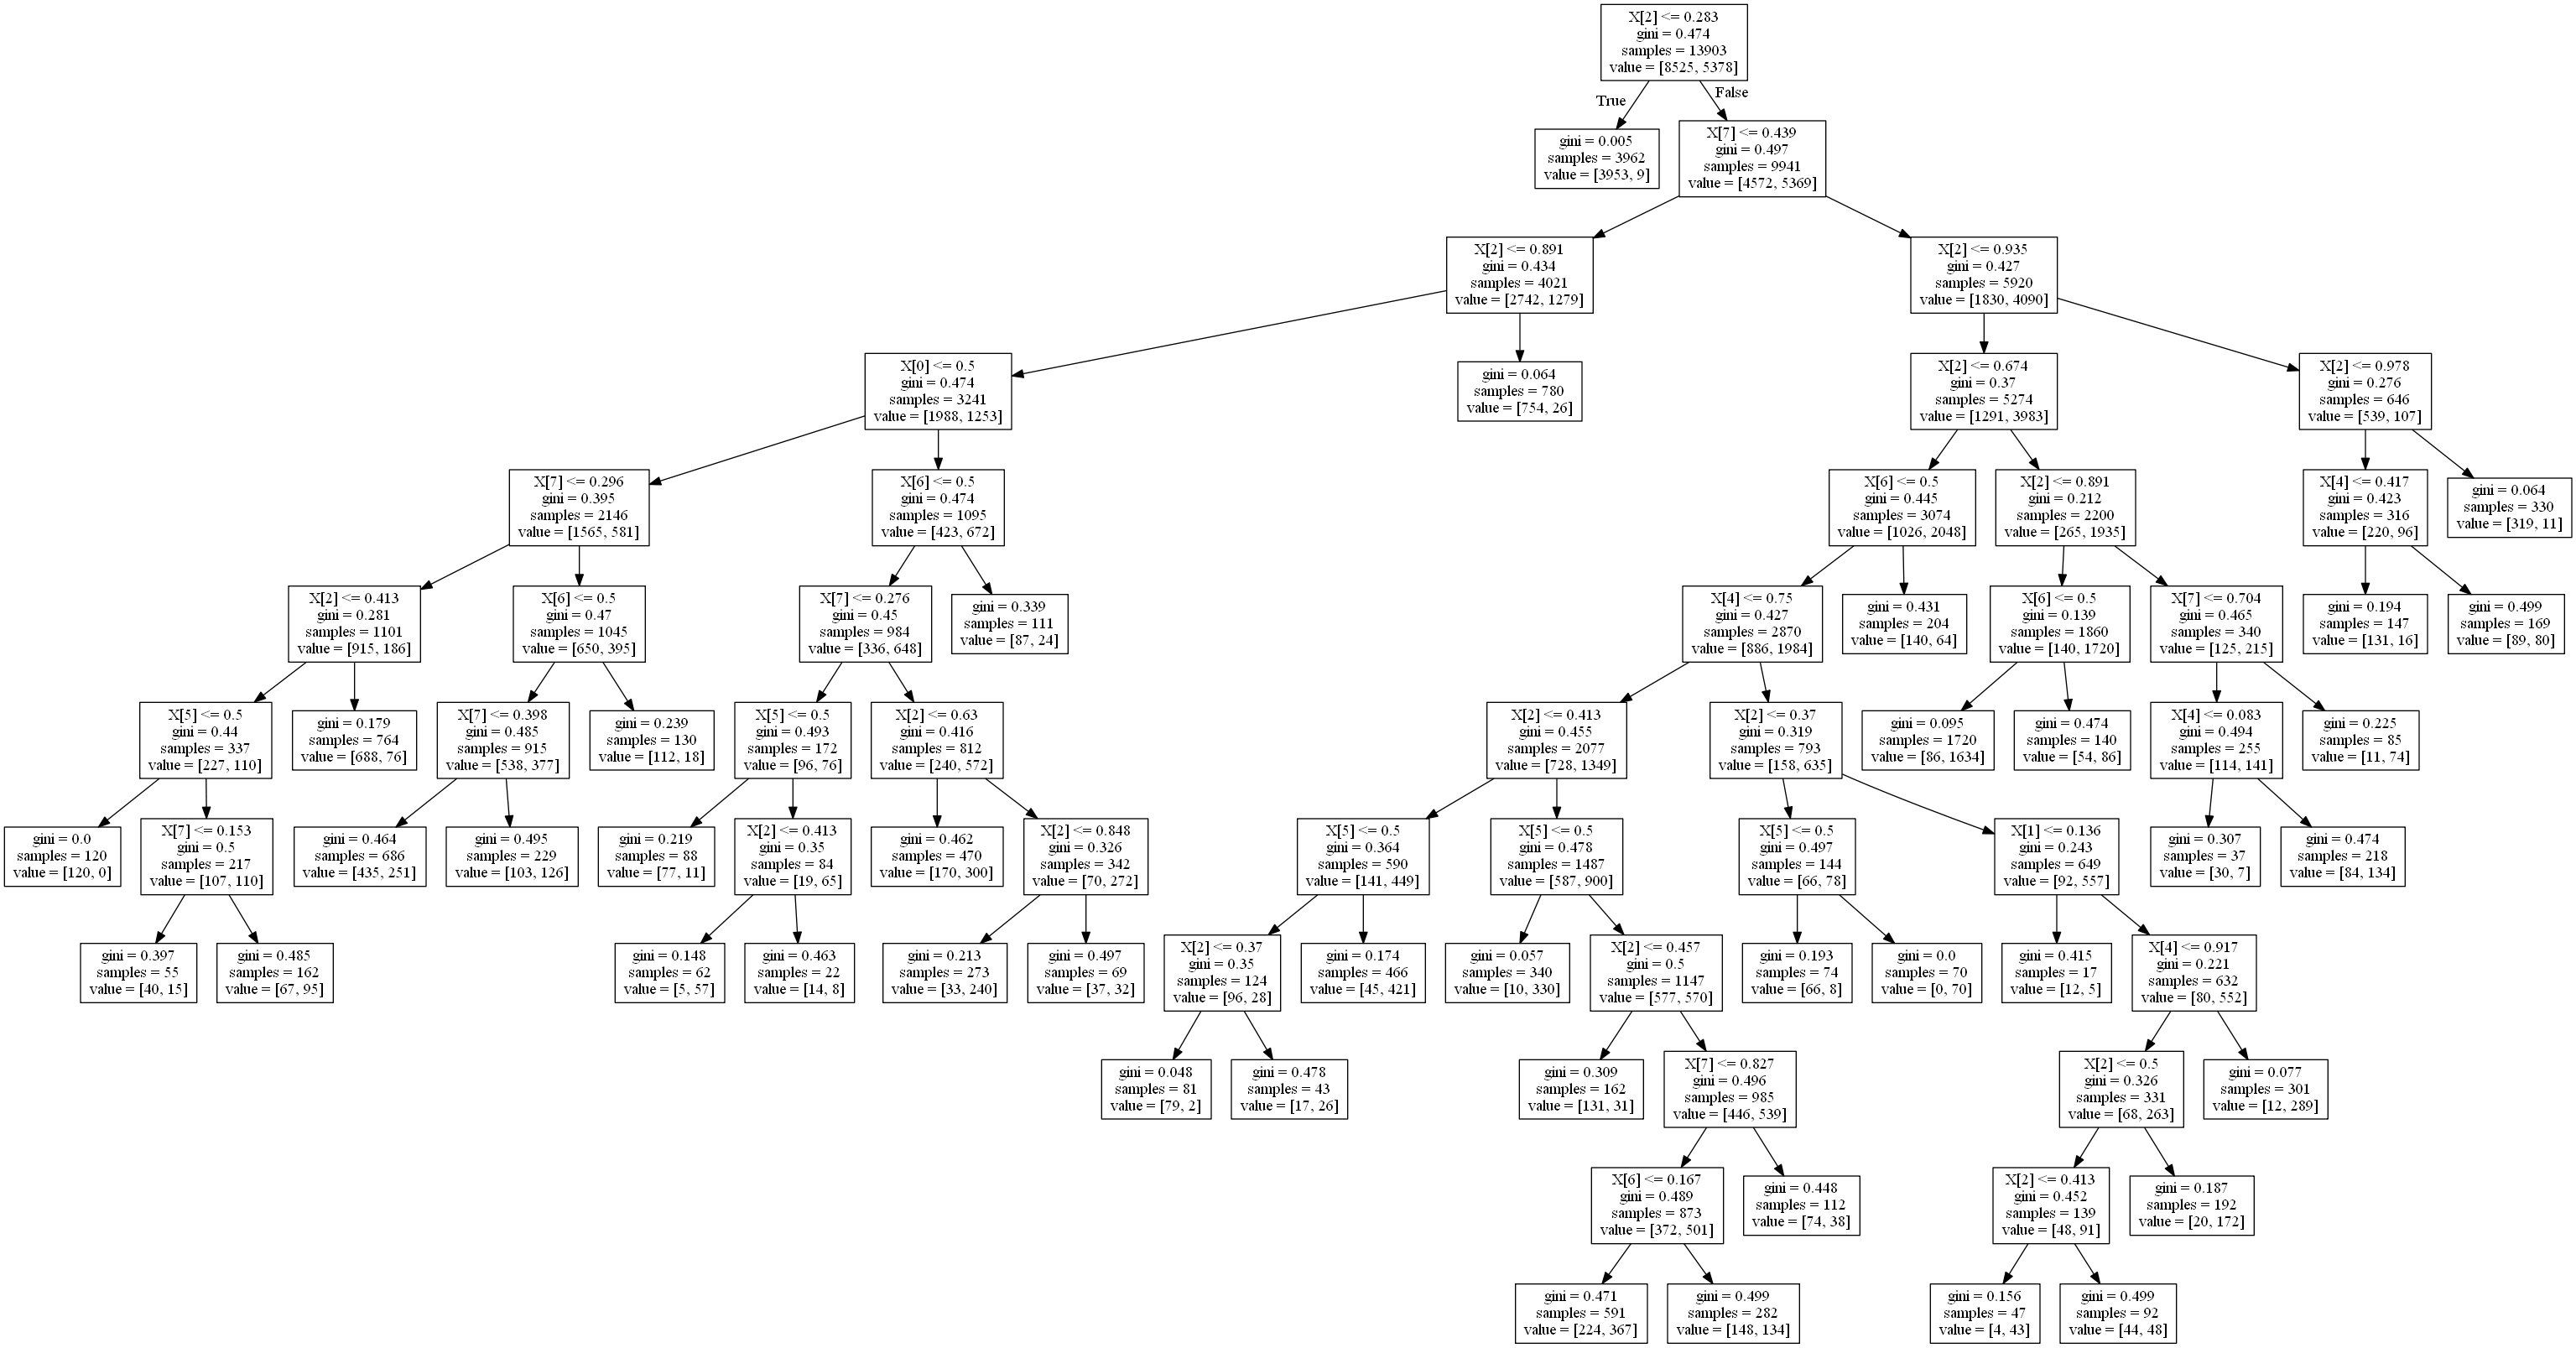

In [23]:
# Gráfica del arbol de decisión clasificación

with open('tree.dot', 'w') as dotfile:
    tree.export_graphviz(arbol_dtc, dotfile)
    
os.system("dot -Tpng tree.dot -o tree.png")
from IPython.core.display import Image
Image("tree.png")
